## Setup and data loading

In [294]:
import re
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


startups_df=pd.read_csv("Startups.csv")
founders_df=pd.read_csv("Founders.csv")

In [295]:
startups_df.rename(columns={
  "Satus":"Status",
  "Amounts raised in different funding rounds":"Amount raised",
  "Headquarters (City)":"HQ City",
  "Headquarters (US State)":"HQ State",
  "Headquarters (Country)":"HQ Country",
},inplace=True)
startups_df['Year Founded'] = startups_df['Year Founded'].astype('Int64')
startups_df.head(1)

,Company,Status,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amount raised,Office Address,HQ City,HQ State,HQ Country,Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website
0,Curebit,Operating,2010,San Francisco - California - USA,Talkable is a social referral platform for onl...,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011,Winter,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...","$1200000, undisclosed amount","290 Division St, #405, San Francisco, Californ...",San Francisco,California,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/curebit,https://www.talkable.com


In [296]:
startups_columns=list(startups_df.columns)
print("number of columns for startups: ",len(startups_columns))
print("available data: ",startups_columns)

number of columns for startups:  19
available data:  ['Company', 'Status', 'Year Founded', 'Mapping Location', 'Description', 'Categories', 'Founders', 'Y Combinator Year', 'Y Combinator Session', 'Investors', 'Amount raised', 'Office Address', 'HQ City', 'HQ State', 'HQ Country', 'Logo', 'Seed-DB / Mattermark Profile', 'Crunchbase / Angel List Profile', 'Website']


In [297]:
founders_df.head(3)

,Founder,Company,Gender
0,Aakash Patel,Flytenow,Male
1,Aarjav Trivedi,InstantCab,Male
2,Aaron Cheung,HomeJoy,Male


## Dataset information

This dataset contains information on almost 700 startup companies backed by Y Combinator between 2005 and 2014.

The data is collected and aggregated from SeedDB, CrunchBase and AngelList

The data included in the dataset is:

1. Startups.csv
  - Company - represents company name	
  - Status - status of the company currently - Operating, Exited, Dead, etc.
  - Year Founded
  - Mapping Location - city, state and country information
  - Description - short description of the company's business
  - Categories - areas the company is working in
  - Founders - list of founders of the company
  - Y Combinator Year - year in which funding from Y Combinator was received by the company
  - Y Combinator Session - summer or winter of this year
  - Investors - list of investors backing the company
  - Amounts raised in different funding rounds - list of amount of funding received over time
  - Office Address
  - Headquarters (City)
  - Headquarters (US State)
  - Headquarters (Country)
  - Logo
  - Seed-DB Profile
  - Crunchbase / Angel List Profile	Website
  - Website


2. Founders.csv
  - Founder
  - Company
  - Gender


## Data cleaning

Y combinator year and session are 2 columns that represent the same event

The winter session is at the start of the year, while the summer one is in the middle

We will combine these 2 columns


In [298]:
condition = startups_df['Y Combinator Session'] == 'Summer'
startups_df.loc[condition,"Y Combinator Year"]+=0.5
startups_df=startups_df.drop(columns="Y Combinator Session")

In [299]:
def amount(text):
    item = [word for word in str(text).split()]
    item = [re.sub(r'\D','',word) for word in item if word != '' and word != '']
    res = [int(ele) for ele in item if ele.strip()]
    return sum(res)
startups_df['Amount raised (USD)'] = startups_df['Amount raised'].apply(amount).astype(int)
startups_df['log amount raised'] = np.log10(startups_df['Amount raised (USD)'])

startups_df=startups_df.drop(columns="Amount raised")

/home/mihailo/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


We can see that the Mapping location information is already contained in the variouls headquarter fields

We also drop the description, office address, logo, company website and company profiles used to obtain this data

We will use some of this data for more complex analysis, but leaving it out for now

In [300]:
startups_df_basic=startups_df.drop(
  [
    'Mapping Location',
    'Description',
    'Office Address',
    'Logo',
    'Website',
    'Crunchbase / Angel List Profile','Seed-DB / Mattermark Profile'
  ]
  ,axis=1
)
startups_df_basic.head(3)

,Company,Status,Year Founded,Categories,Founders,Y Combinator Year,Investors,HQ City,HQ State,HQ Country,Amount raised (USD),log amount raised
0,Curebit,Operating,2010,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011.0,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...",San Francisco,California,USA,1200000,6.079181
1,Goldbely,Operating,<NA>,"Social, E-Commerce","Joe Ariel, Joel Gillman, Trevor Stow, Vanessa ...",2013.0,"500 Startups, Funders Club, Dave McClure, Tim ...",San Francisco,California,USA,3000000,6.477121
2,theDailyMuse,Operating,2011,NaN,"Alex Cavoulacos, Kathryn Minshew, Melissa McCr...",2012.0,"500 Startups, Great Oaks Venture Capital, Grea...",New York City,New York,USA,7300000,6.863323


In [301]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company                          688 non-null    object 
 1   Status                           688 non-null    object 
 2   Year Founded                     151 non-null    Int64  
 3   Mapping Location                 488 non-null    object 
 4   Description                      605 non-null    object 
 5   Categories                       547 non-null    object 
 6   Founders                         449 non-null    object 
 7   Y Combinator Year                688 non-null    float64
 8   Investors                        688 non-null    object 
 9   Office Address                   444 non-null    object 
 10  HQ City                          480 non-null    object 
 11  HQ State                         451 non-null    object 
 12  HQ Country            

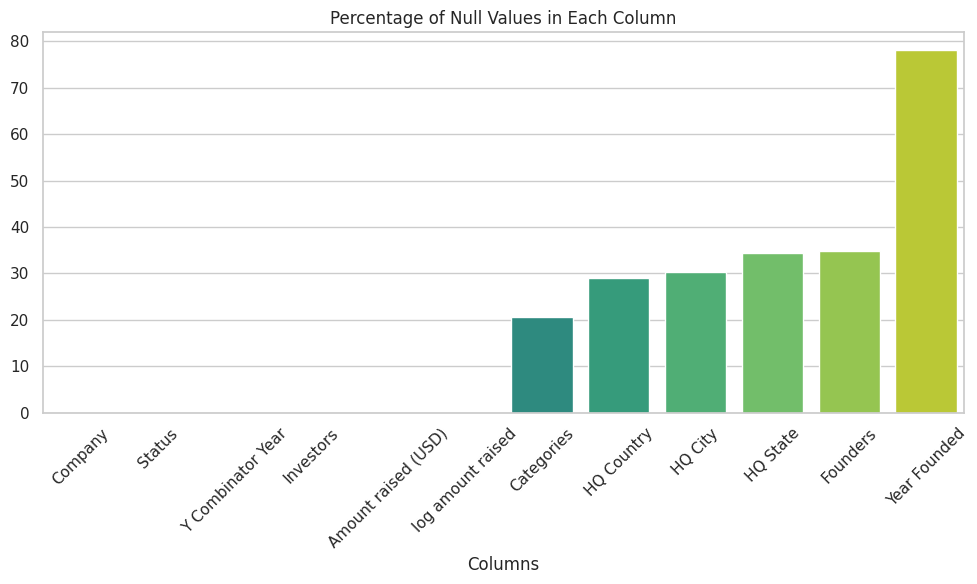

In [302]:
null_pcts = (startups_df_basic.isnull().sum().sort_values(ascending=True)/len(startups_df_basic))*100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_pcts.index, y=null_pcts.values, palette='viridis')
plt.xlabel('Columns')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that our dataset has significant amounts of null values for information about year founded, location and founders

However, the dataset has low amounts of null values for information relating to company operations and investors/investing which is more relevant to us

We will take a look at time-series data - founding and y-combinator funding date, noting the low amonuts of data available

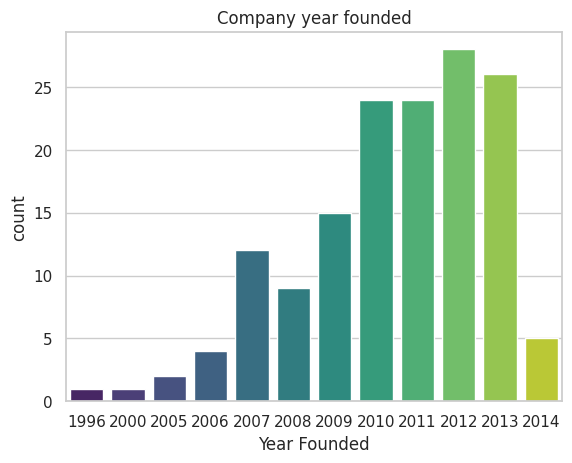

In [303]:
startups_with_founding_year=startups_df_basic.dropna(subset=['Year Founded'])
sns.countplot(data=startups_with_founding_year, x='Year Founded', palette='viridis')
plt.title("Company year founded")
plt.show()

There is a significant increase in the number of companies founded over time. This may be explained by an increase in the number of startups, but is more likely due to a correlation between founding year and year applying to Y-combinator, and the increase in popularity of Y-combinator over time

/tmp/ipykernel_257408/2412764555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startups_with_founding_year['Year Founded'] = startups_with_founding_year['Year Founded'].astype(float)
/tmp/ipykernel_257408/2412764555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startups_with_founding_year['Time Until Funding'] = startups_with_founding_year['Y Combinator Year'] - startups_with_founding_year['Year Founded']


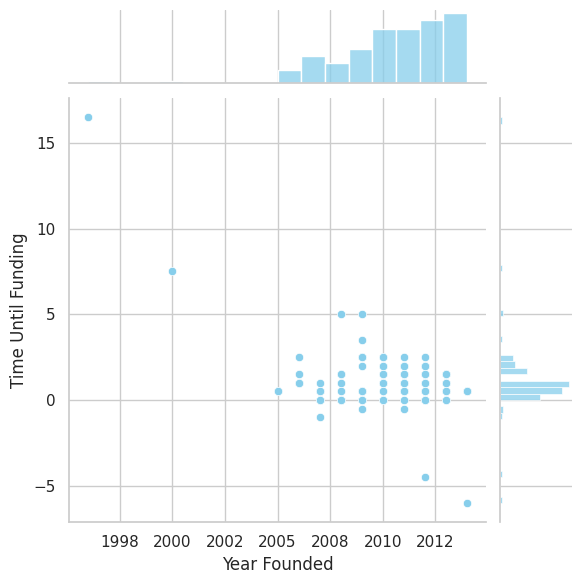

In [304]:
startups_with_founding_year['Year Founded'] = startups_with_founding_year['Year Founded'].astype(float)

#  Calculate the delay until Y Combinator Year
startups_with_founding_year['Time Until Funding'] = startups_with_founding_year['Y Combinator Year'] - startups_with_founding_year['Year Founded']

# Create a jointplot
sns.set(style="whitegrid")
joint = sns.jointplot(data=startups_with_founding_year, x='Year Founded', y='Time Until Funding', kind='scatter', color='skyblue')

# Customize the x-axis tick labels to display as integers
joint.ax_joint.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.show()

We can see that a vast majority of the startups receive funding within 1 year of being founded, some receive it within 2. This confirms our previous assumption that the increase in the number of startups is mostly caused by Y-combinator accepting more and more companies over time

There is no significant correlation between founding year and time to receive funding

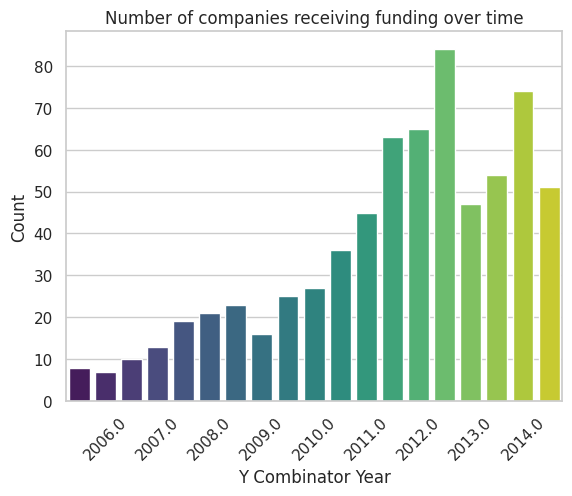

In [305]:
sns.set(style="whitegrid")
ax = sns.countplot(data=startups_df_basic, x='Y Combinator Year', palette='viridis')

# Show every 2nd value on the x-axis
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth == 0:
        label.set_visible(False)

plt.title("Number of companies receiving funding over time")
plt.xlabel("Y Combinator Year")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

We again confirm on the larger dataset that the number of companies receiving YC funding is the main factor which was contributing to the number of companies being founded each year growing

Now, lets take a look at the geographic distribution of the startups

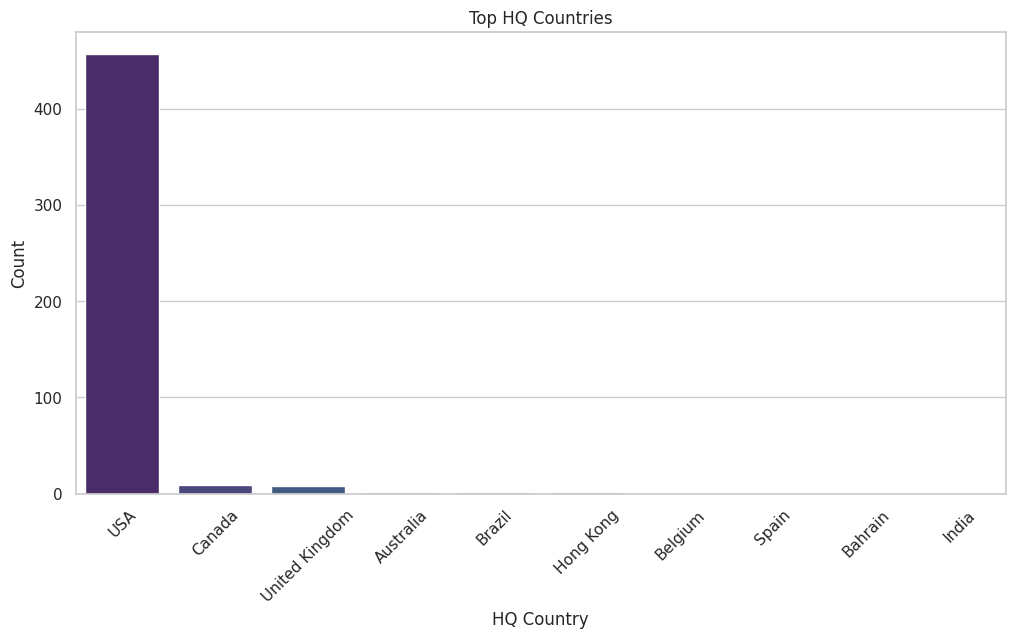

In [306]:
# Calculate value counts for "HQ Country" and select the top 10
top_countries = startups_df_basic['HQ Country'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ Country', order=top_countries.index, palette='viridis')

plt.title("Top HQ Countries")
plt.xlabel("HQ Country")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

The vast majority of the companies analyzed are in the USA (~95% of companies with known location data)

We can take a look at the distribution of non-USA based startups

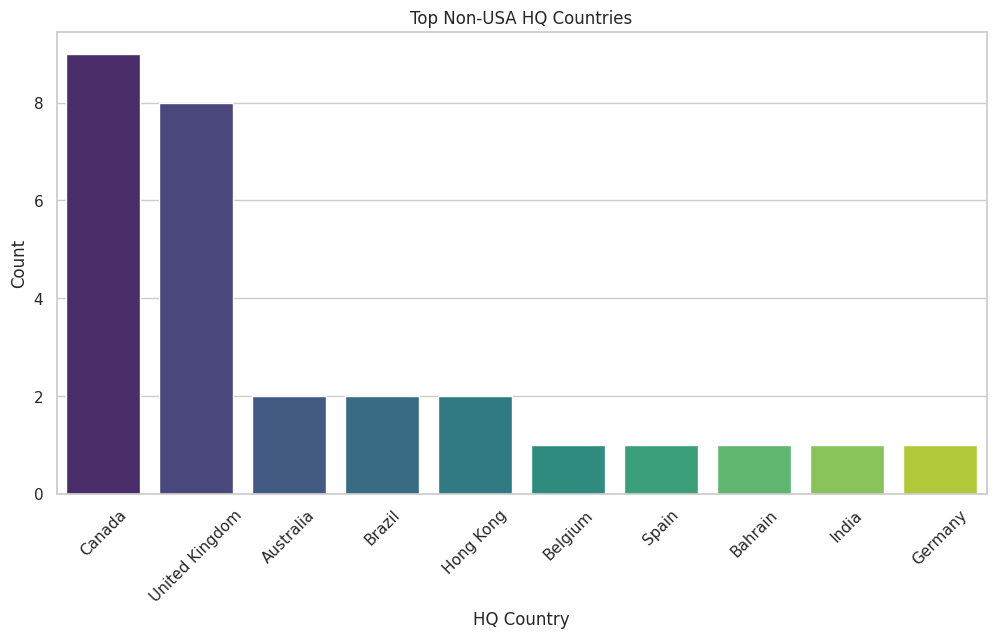

In [307]:
# Calculate value counts for "HQ Country" and select the top 10
top_countries = startups_df_basic.where(startups_df_basic['HQ Country']!="USA")['HQ Country'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ Country', order=top_countries.index, palette='viridis')

plt.title("Top Non-USA HQ Countries")
plt.xlabel("HQ Country")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

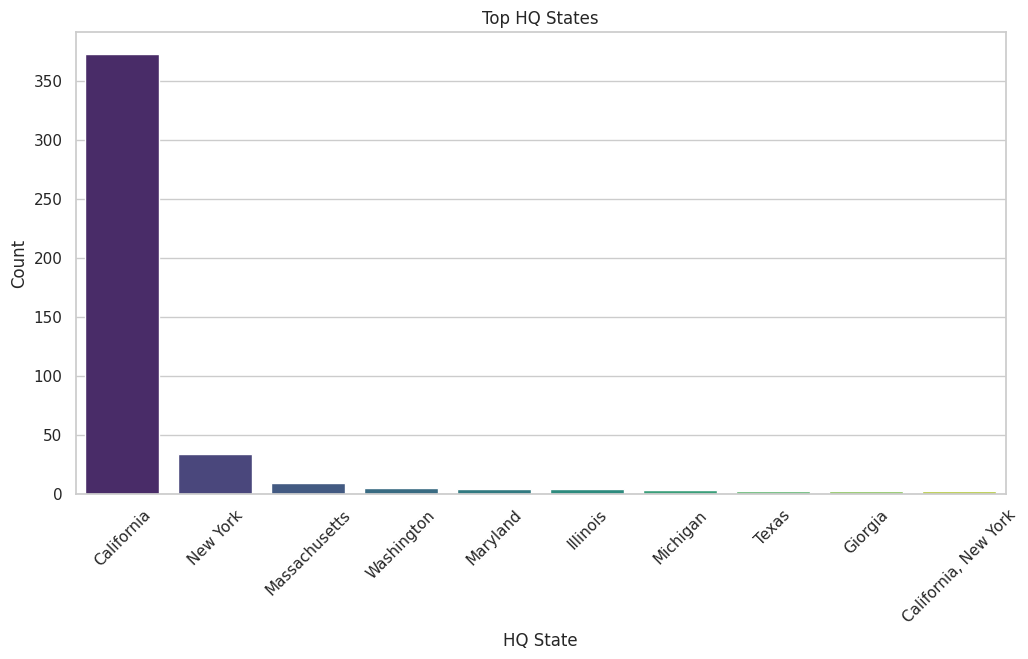

In [308]:
top_states = startups_df_basic['HQ State'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ State', order=top_states.index, palette='viridis')

plt.title("Top HQ States")
plt.xlabel("HQ State")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

About 90% of all companies with location data are in California

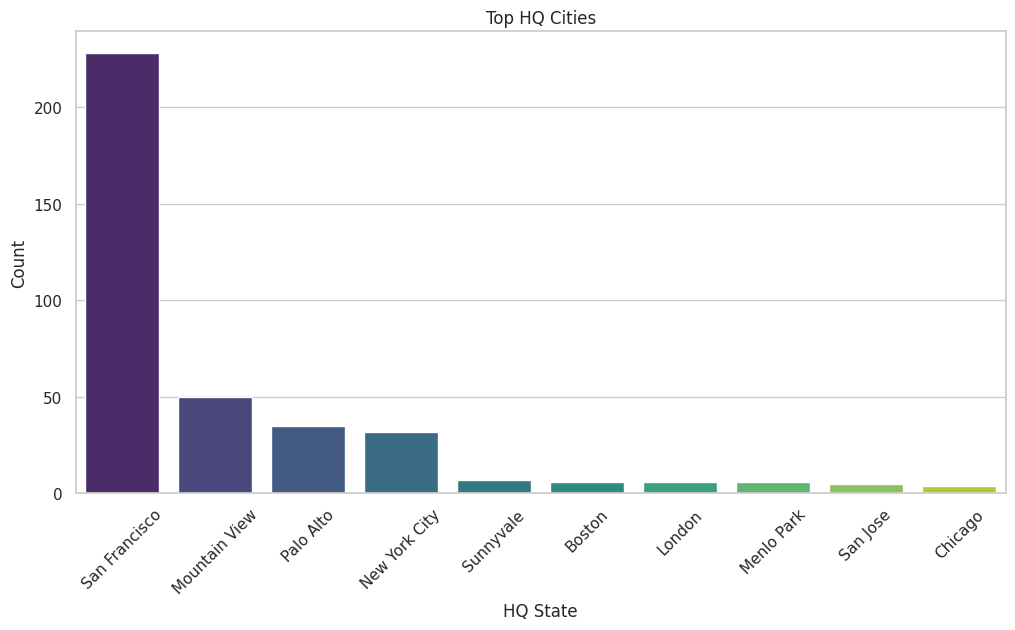

In [309]:
top_cities = startups_df_basic['HQ City'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ City', order=top_cities.index, palette='viridis')

plt.title("Top HQ Cities")
plt.xlabel("HQ State")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

About half of the total companies are in San Francisco

Almost all the others are in Mountain View and Palo Alto (California) and New York City

We can now start looking at the amount of money raised by companies

In [310]:
startups_with_amount_raised=startups_df_basic[startups_df_basic["Amount raised (USD)"]>0.1]
print(len(startups_with_amount_raised))


317


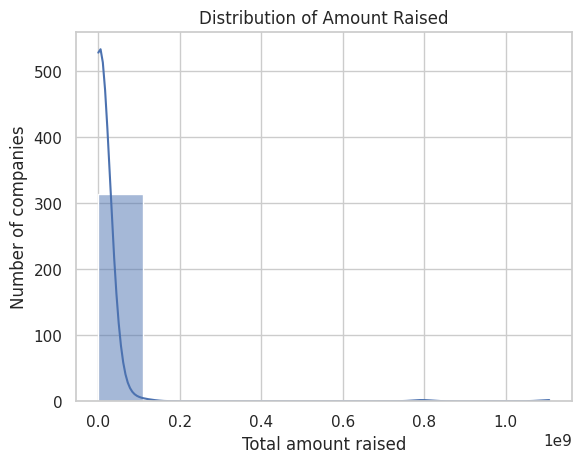

In [311]:
sns.histplot(data=startups_with_amount_raised, x='Amount raised (USD)', kde=True, bins=10)
plt.xlabel('Total amount raised')
plt.ylabel('Number of companies')
plt.title('Distribution of Amount Raised')
plt.show()


In [312]:
startups_with_amount_raised["Amount raised (USD)"].describe()

count    3.170000e+02
mean     1.224363e+07
std      7.710528e+07
min      1.000000e+04
25%      3.900000e+05
50%      1.500000e+06
75%      5.500000e+06
max      1.107215e+09
Name: Amount raised (USD), dtype: float64

We can see that the distribution of the amount raised varies drastically across scale - from 10k USD to over 1bil USD, so we will look at the log of this amount in the future

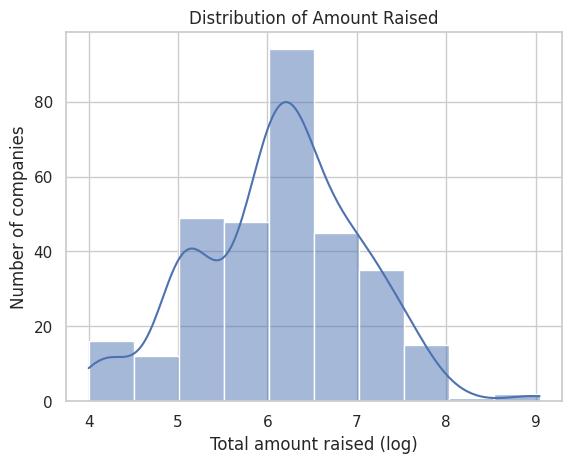

In [313]:
sns.histplot(data=startups_with_amount_raised, x='log amount raised', kde=True, bins=10)
plt.xlabel('Total amount raised (log)')
plt.ylabel('Number of companies')
plt.title('Distribution of Amount Raised')
plt.show()

We can see that the log of the amount raised is approximately normally distributed, with the mean being around 6,2 or 1.5 million USD